In [1]:
# because the kernel will die
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
import torch

# print(torch.__version__)
# 1.8.2+cu111

# torch.cuda.is_available()

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('../data/canon-bird.jpg')
# img.show()

In [4]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

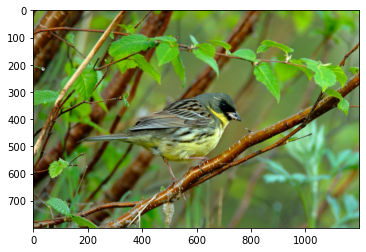

In [5]:
plt.imshow(img)

In [6]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

In [7]:
img_tensor = transform(img)

In [8]:
img_tensor.shape, type(img_tensor)

(torch.Size([3, 224, 224]), torch.Tensor)

In [9]:
batch = img_tensor.unsqueeze(0)
batch.shape

torch.Size([1, 3, 224, 224])

In [10]:
from torchvision.models import alexnet

model = alexnet(pretrained=True)

In [11]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [12]:
model.eval()
model = model.to(device)

In [13]:
predictions = model(batch.to(device))

In [14]:
predictions.shape , type(predictions)

(torch.Size([1, 1000]), torch.Tensor)

In [15]:
pred_max, index = torch.max(predictions, 1)
pred_max, index

(tensor([10.4377], device='cuda:0', grad_fn=<MaxBackward0>),
 tensor([10], device='cuda:0'))

In [16]:
_, index = torch.max(predictions, 1)
index.item()

10